In [1]:
%matplotlib inline
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

### Camera calibration

In [2]:
def get_objpoints(pattern_size):
    nx, ny = pattern_size
    objpoints = np.zeros((nx*ny,3), np.float32)
    objpoints[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)
    return objpoints

def get_corners(img, pattern_size, show_img=False):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, pattern_size, None)

    # If found, draw corners
    if show_img:
        img_copy = img.copy()
        if ret == True:
            cv2.drawChessboardCorners(img_copy, pattern_size, corners, ret)
        else:
            print('Could not find corners for image')
        plt.figure()
        plt.imshow(img_copy)
    
    if ret is False:
        return None
    return corners

In [3]:
def cal_undistort(img, mtx, dist):
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    return dst

def calibrate(imgs, pattern_size):
    imgpoints = []
    objpoints = []
    
    for idx, img in enumerate(imgs):
        imgp = get_corners(img, pattern_size)
        if imgp is None: 
            continue
        op = get_objpoints(pattern_size)
        
        imgpoints.append(imgp)
        objpoints.append(op)
    
    gray = cv2.cvtColor(imgs[0], cv2.COLOR_BGR2GRAY)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    return mtx, dist

In [4]:
camera_files = glob.glob('camera_cal/*.jpg')

camera_imgs = list(map(cv2.imread, camera_files))

default_pattern_size = (9, 6)
mtx, dist = calibrate(camera_imgs, default_pattern_size)

In [5]:
undistorted_imgs = []
for camera_img in camera_imgs:
    dst = cal_undistort(camera_img, mtx, dist)
    undistorted_imgs.append(dst)

### Visualize Undistorted Images

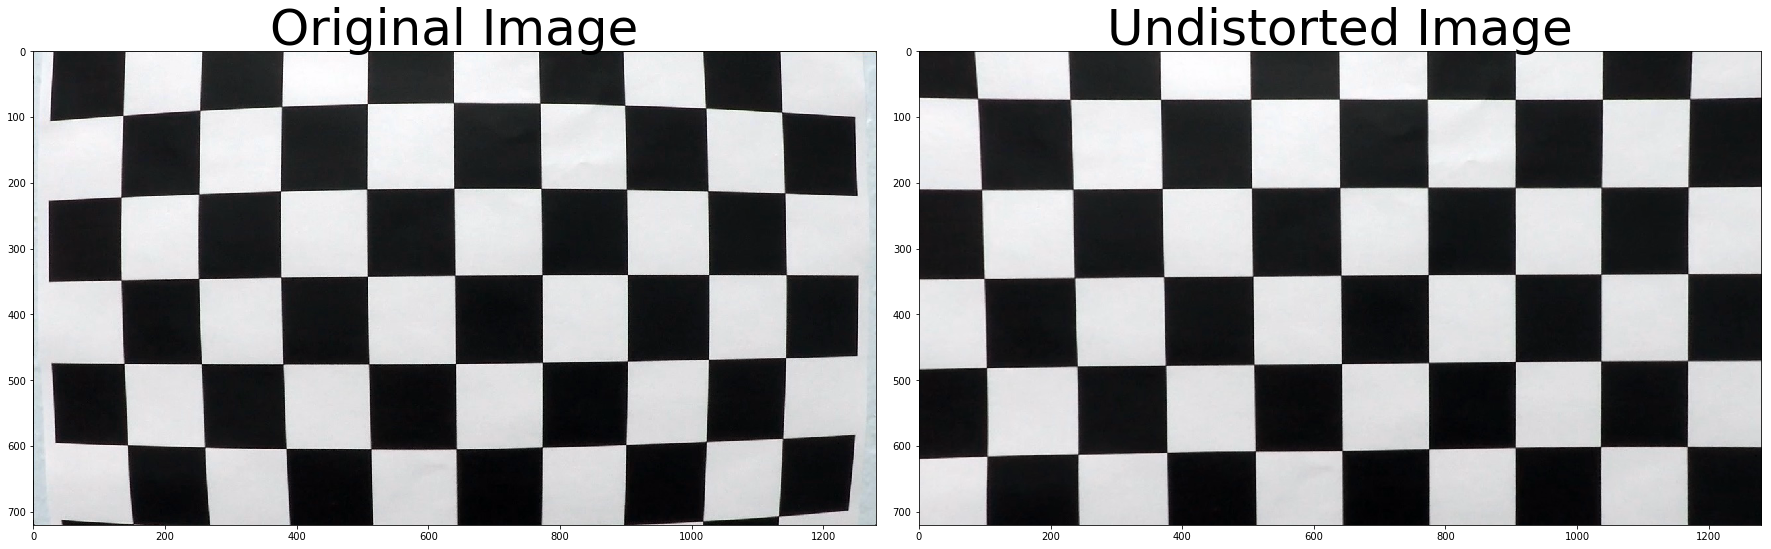

In [6]:
def compare_distortion(idx):
    undistorted = undistorted_imgs[idx]
    img = camera_imgs[idx]
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()
    ax1.imshow(img)
    ax1.set_title('Original Image', fontsize=50)
    ax2.imshow(undistorted)
    ax2.set_title('Undistorted Image', fontsize=50)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
#     f.savefig('examples/user_added/undistorted_chessboard_11.png')
    
compare_distortion(0)


### Save camera distortion params

In [7]:
data_dir = 'data/'
np.save(data_dir+'mtx.npy', mtx)
np.save(data_dir+'dist.npy', dist)

### Show test image distortion

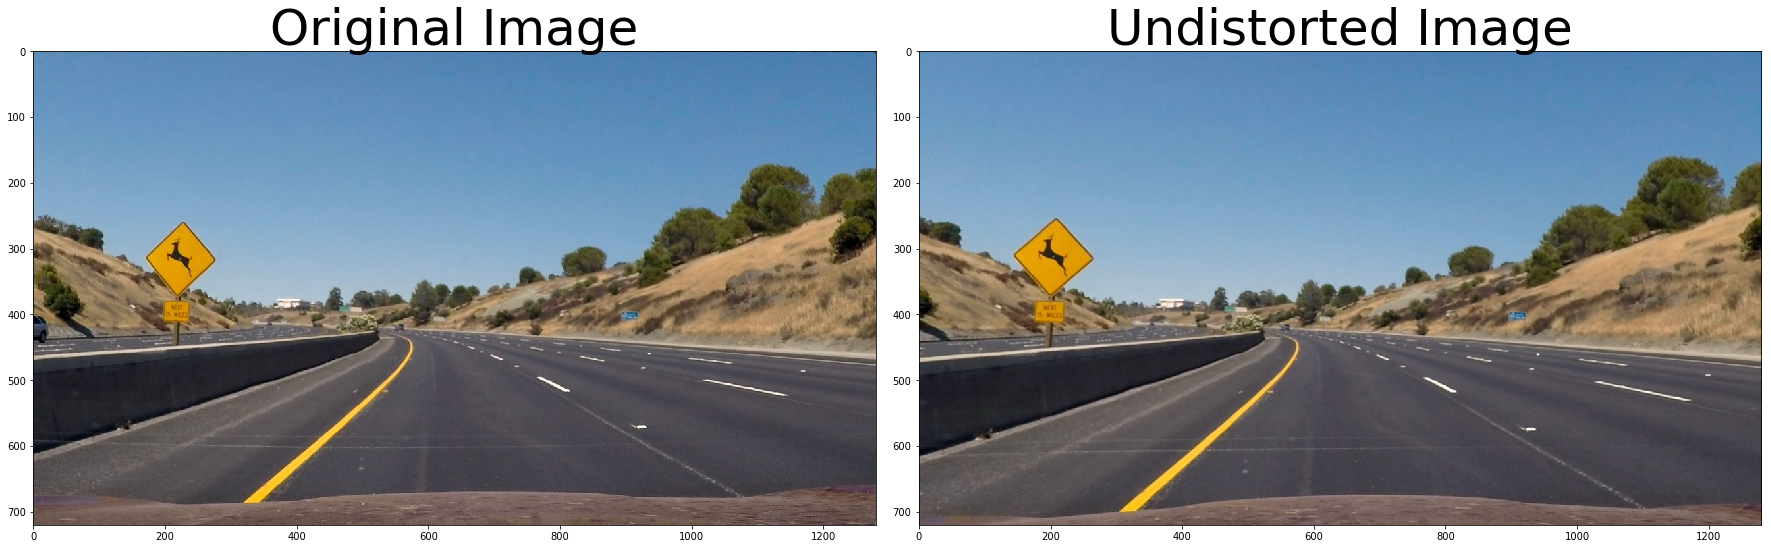

In [8]:
import imageio
import glob

def undistort_img(img):
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    return dst
    
def compare_distortion(idx):
    undistorted = undistorted_imgs[idx]
    img = test_imgs[idx]
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()
    ax1.imshow(img)
    ax1.set_title('Original Image', fontsize=50)
    ax2.imshow(undistorted)
    ax2.set_title('Undistorted Image', fontsize=50)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    f.savefig('examples/user_added/undistorted_lane_3.png')
    
test_files = glob.glob('test_images/*.jpg')
test_imgs = []
for file in test_files:
    img = cv2.imread(file, cv2.IMREAD_COLOR)
    test_imgs.append(np.flip(img, 2)) # opencv uses bgr instead of rgb
    
undistorted_imgs = []
for img in test_imgs:
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    undistorted_imgs.append(dst)
    
compare_distortion(3)